Important step for integrating the pacakage

In [1]:
from dataset.albi import Albi
from torchvision.transforms import transforms
from torch.utils.data import DataLoader

In [2]:
compose = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [3]:
dataset = Albi(download=True, transform=compose)
loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

Dataset already exists. Skipping download.


In [4]:
# Test the DataLoader
for images, bboxes in loader:
    print("Image batch shape:", images.shape)
    print("Bounding box batch shape:", bboxes.shape)
    break

/Users/fauzanghaza/Applications/miniconda3/envs/gemastik/lib/python3.9/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Image batch shape: torch.Size([2, 3, 128, 128])
Bounding box batch shape: torch.Size([2, 4])


/Users/fauzanghaza/Applications/miniconda3/envs/gemastik/lib/python3.9/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


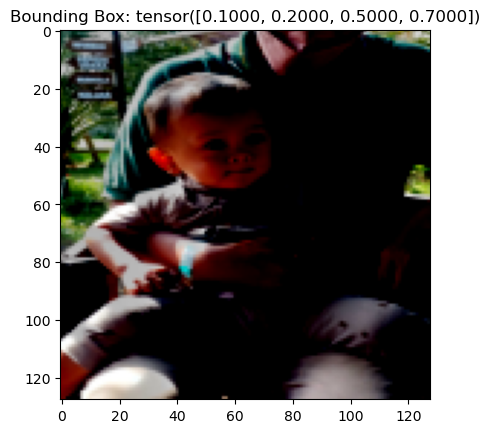

In [5]:
import matplotlib.pyplot as plt
import numpy as np

image, bbox = next(iter(loader))

image = image[0].permute(1, 2, 0).numpy()

image = np.clip(image, 0, 1)

plt.imshow(image)
plt.title(f"Bounding Box: {bbox[0]}")
plt.show()